# 練習內容
計算 Bounding Box Regression 的 Loss

# 練習目的
- 了解如何使用 Proposal 與 標註框 計算 Loss
- 理解我們所要預測的並不是實際的 (x,y,w,h)，而是偏置量和縮放量

In [4]:
import cv2
import matplotlib.patches as patches
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 讀入照片
image = cv2.imread('image/dog.jpg')

# 由於 cv2 會將照片讀成 BGR，因此需要我們需要將其轉為 RGB
image = image[:, :, ::-1]

將 Bounding Box 的格式設為 (x ,y, w, h)
也就是左上角的點的座標（x, y），以及 Bounding Box 的寬和高（x, y）

In [5]:
ground_truth_bbox = [1900, 700, 1800, 1800]
region_proposal = [1800, 800, 1500, 1500]

C:\Users\x2206\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\x2206\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The TextWithDash class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Annotation instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\x2206\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
  
C:\Users\x2206\AppData\Roaming\Python\Python36\site-packa

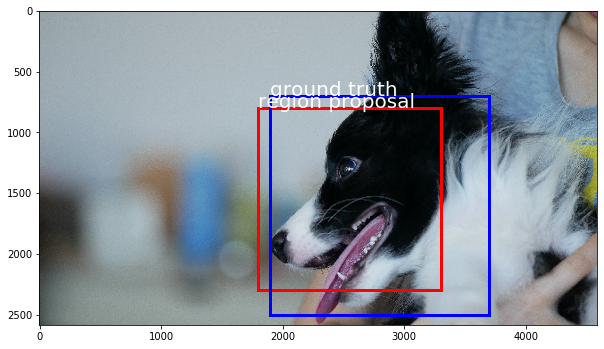

In [29]:
plt.rcParams['figure.figsize'] = (10, 10)

fig, ax = plt.subplots(1)

# 畫出圖片
ax.imshow(image)

# bounding box of prediction
rect_prediction = patches.Rectangle((region_proposal[0], region_proposal[1]), region_proposal[2], region_proposal[3], linewidth=3, edgecolor='r', facecolor='none')
ax.text(region_proposal[0], region_proposal[1], 'region proposal', withdash=True, size=20, color='white')

# bounding box of ground truth
rect_ground_truth = patches.Rectangle((ground_truth_bbox[0], ground_truth_bbox[1]), ground_truth_bbox[2], ground_truth_bbox[3], linewidth=3, edgecolor='b', facecolor='none')
ax.text(ground_truth_bbox[0], ground_truth_bbox[1], 'ground truth', withdash=True, size=20, color='white')

# Add the patch to the Axes
ax.add_patch(rect_prediction)
ax.add_patch(rect_ground_truth)



計算 t_i

In [15]:
tx = (ground_truth_bbox[0] - region_proposal[0]) / region_proposal[2]
ty = (ground_truth_bbox[1] - region_proposal[1]) / region_proposal[3]
tw = np.log(ground_truth_bbox[2] / region_proposal[2])
th = np.log(ground_truth_bbox[3] / region_proposal[3])

In [17]:
print('x 偏移量：{}'.format(tx))
print('y 偏移量：{}'.format(ty))
print('w 縮放量：{}'.format(tw))
print('h 縮放量：{}'.format(th))

x 偏移量：0.06666666666666667
y 偏移量：-0.06666666666666667
w 縮放量：0.1823215567939546
h 縮放量：0.1823215567939546


現在，我們假設預測的偏移量和縮放量為 (dx, dy, dw, dh)

In [23]:
dx, dy, dw, dh = [0.05, -0.05, 0.12, 0.17]

In [24]:
loss = np.sum(np.square(np.array([dx, dy, dw, dh]) - np.array([tx, ty, tw, th])))

In [26]:
print('Loss值：{}'.format(loss))

Loss值：0.004591352758604312
